# Margaret Doyle
margaret.doyle@berkeley.edu


HW4: Parallelism

due Tuesday Feb 22, 2022 


# #Problem 1 

In [1]:
%%writefile prob1.py
from random import uniform
from math import sqrt
from time import time 
from dask import delayed
import argparse
import multiprocessing 
from concurrent.futures import ProcessPoolExecutor


#Dart throwing function 
def dart(number_of_darts):
    number_of_darts_in_circle= 0 
    x,y=uniform(0,1), uniform(0,1)
    if sqrt((x-0.5)**2 + (y-0.5)**2) <=0.5:
        number_of_darts_in_circle +=1
    return number_of_darts_in_circle

#Delayed dart throwing function to use with Dask 
@delayed(pure=True)
def dart_delayed(number_of_darts):
    number_of_darts_in_circle= 0 
    for x in range(number_of_darts):
        x,y=uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2 + (y-0.5)**2) <=0.5:
            number_of_darts_in_circle +=1
    return number_of_darts_in_circle 

#Delayed addition function to use with dasks
@delayed(pure=True)
def add(x, y, z):
    return x + y + z

#Function for experimenting with simple serial, multiprocessing and dask 
def throw_in_parallel(nthrow):
    print("%d darts" %nthrow)
    ##################
    print('##Multiprocessing##')
    number_of_darts_in_circle = 0
    pools = multiprocessing.Pool(processes=multiprocessing.cpu_count())
    start = time()
    results = pools.map(dart,range(nthrow))
    totaldart = sum(results)
    end=time()
    execution_time=end - start
    pi_approx = 4 *  totaldart / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ",  totaldart)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)

   ##################
    print('##Simple Serial##')
    number_of_darts_in_circle = 0
    start = time()
    results = []
    for x in range(nthrow):
        results.append(dart(x))
    totaldart = sum(results)
    end= time()
    execution_time= end - start
    pi_approx = 4 *  totaldart / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ", totaldart)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)

       ##################
    print('##Dask##')
    number_of_darts_in_circle = 0
    start = time()
    
    #Split up manually into three chunks
    values1 = (dart_delayed(int(nthrow/3)))
    values2 = (dart_delayed(int(nthrow/3)))
    values3 = (dart_delayed(nthrow -2*int(nthrow/3)))
    values4 = add(values1,values2,values3)
    results = values4.compute()
    end= time()
    execution_time = end - start
    pi_approx = 4 *  results / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ",results)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)
    print('\n')

if __name__ == "__main__":
    #Allow user to input number of darts
    parser = argparse.ArgumentParser(description='Sample Application')
    parser.add_argument('-s', action='store', dest='num_throws',
                    help='Store a simple value')
    results = parser.parse_args()
    nthrow = results.num_throws
    nthrow = int(nthrow)

throw_in_parallel(nthrow)
  

Overwriting prob1.py


# Run several trials with different numbers of darts thrown

In [2]:
!python prob1.py -s 10
!python prob1.py -s 10000
!python prob1.py -s 100000
!python prob1.py -s 100000000

10 darts
##Multiprocessing##
Finished in 0.0014967918395996094 sec
Num darts hit =  9
Pi approx: 3.6
Darts thrown per second: 6680.9557183816505
##Simple Serial##
Finished in 4.601478576660156e-05 sec
Num darts hit =  4
Pi approx: 1.6
Darts thrown per second: 217321.45077720206
##Dask##
Finished in 0.006640911102294922 sec
Num darts hit =  6
Pi approx: 2.4
Darts thrown per second: 1505.8174768435413


10000 darts
##Multiprocessing##
Finished in 0.006179094314575195 sec
Num darts hit =  7861
Pi approx: 3.1444
Darts thrown per second: 1618360.1497086855
##Simple Serial##
Finished in 0.008125066757202148 sec
Num darts hit =  7855
Pi approx: 3.142
Darts thrown per second: 1230759.118518736
##Dask##
Finished in 0.00975489616394043 sec
Num darts hit =  7827
Pi approx: 3.1308
Darts thrown per second: 1025126.2373212759


100000 darts
##Multiprocessing##
Finished in 0.04956197738647461 sec
Num darts hit =  78612
Pi approx: 3.14448
Darts thrown per second: 2017675.7521238418
##Simple Serial##
F

# #Problem 2, plotting execution time as function of number of darts 

In [3]:
con_time_all = []
serial_time_all = []
dask_time_all =[]
serial_rate_all=[]
con_rate_all=[]
dask_rate_all =[]
darts =[]

for x in [10, 100,1000,   10000, 100000, 1000000, 10000000]:

    a = !python prob1.py -s $x
    darts.append(x)

    #Split up and store output for plotting 
    con_time = float(a[2].split()[2])
    serial_time = float(a[7].split()[2])
    dask_time = float(a[12].split()[2])

    con_rate = float(a[5].split()[4])
    serial_rate =float(a[10].split()[4])
    dask_rate = float(a[15].split()[4])

    con_time_all.append(con_time)
    serial_time_all.append(serial_time)
    dask_time_all.append(dask_time)
    
    con_rate_all.append(con_rate)
    serial_rate_all.append(serial_rate)
    dask_rate_all.append(dask_rate)
    

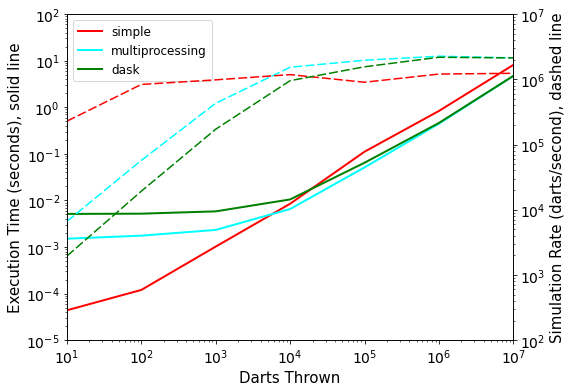

Processor: 3.5 GHz Dual-Core Intel Core i7, 4 'cores' 


In [5]:
import matplotlib.pyplot as plt
import multiprocessing
fig, ax1 = plt.subplots(figsize=[8,6])
ax2 = ax1.twinx()
ax1.plot(darts,serial_time_all, color = 'red', linewidth=2, label ='simple')
ax1.plot(darts,con_time_all, color='cyan' ,linewidth=2, label = 'multiprocessing')
ax1.plot(darts,dask_time_all, color='green',linewidth=2, label='dask')


ax2.plot(darts,con_rate_all, dashes=[6, 2], color='cyan' )
ax2.plot(darts,serial_rate_all, dashes=[6, 2], color = 'red')
ax2.plot(darts,dask_rate_all,  dashes=[6, 2],  color='green',)

ax1.set_ylabel('Execution Time (seconds), solid line',fontsize=15)
ax2.set_ylabel('Simulation Rate (darts/second), dashed line',fontsize=15)
ax1.loglog()
ax2.loglog()

ax1.set_ylim(1e-5, 1e2)
ax2.set_ylim(1e2, 1e7)
ax1.set_xlim(1e1, 1e7)
ax1.set_xlabel('Darts Thrown',fontsize=15)
ax1.legend(loc='upper left',fontsize=12)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.show()
print("Processor: 3.5 GHz Dual-Core Intel Core i7, %d 'cores' " %multiprocessing.cpu_count())

**Behavior of plot** : Written in README File !

# #Problem 3, Write a short narrative explaining the differences and advantages between the approaches.

When dealing with a smaller number of tasks (n < 1e4), simple serial will be the most efficient method to use (will be as fast as ~1e-4 seconds!) . This is due to the fact that both dask and multiprocessing require additional indirect time which is dedicated towards preparing the calculation before execution (overhead). Since this overhead time is non trivial, the benefits of parallelization will really only begin to outweigh the cost of once the calculation grow large enough (n > 1e4), at which point the improvements in rate and execution time of both dask and multiprocessing begin to show a slight improvement over simple serial. 

So, for small n, it is best to use simple serial. Not to mention, sometimes transferring code from serial to something parallel is not so obvious. Of course, there are occasions when a piece of code is "embarrassingly parallel" , but in occasions when it is not, much time will be wasted actually writing out the code, which may not be so much fun. 

When comparing both dask and multiprocessing, it appears that the latter starts out faster for small n.  However, once n > 1e5, both methods appear to converge to operate at roughly the same rate and with roughly the same execution time. Dask can be nice as it allows for operations to take place on very large sets of data which may otherwise not fit into memory. Dask can also be nice when working with NumPy arrays. 